In [1]:
import pandas as pd
df = pd.read_csv("/Users/home/Documents/ml/data/marketing_campaign.csv",sep=';')

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
#1
print("количество жалоб за последние 2 года =", sum(df['Complain']))
mnt = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
print("средний возвраст всех людей из датасета", 
int(2024-df['Year_Birth'].mean()), "равен среднему возрасту покупателей", int(2024-df[df[mnt].sum(axis=1)>0]['Year_Birth'].mean()))

количество жалоб за последние 2 года = 21
средний возвраст всех людей из датасета 55 равен среднему возрасту покупателей 55


In [4]:
df["Age"] = [int(2024-i) for i in df['Year_Birth']]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,68


In [5]:
#2
import matplotlib.pyplot as plt
col = ["Education",
"Marital_Status",
"Income",
"Kidhome",
"Teenhome",
"Recency",
"NumWebPurchases",
"NumStorePurchases",
"Age"]

In [6]:
def plot_for_2categorial(feature1, feature2):
    dd = pd.get_dummies(df[feature1])
    dd[feature2] = df[feature2]
    dd = dd.groupby(feature2).mean()
    dd.plot.bar()

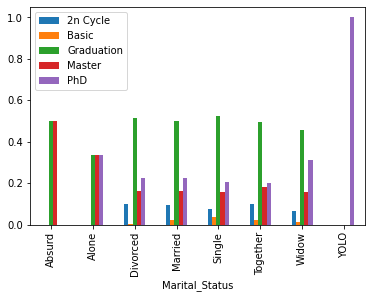

In [7]:
plot_for_2categorial("Education", "Marital_Status")
#в среднем между статусами очень разные распределения образования

In [8]:
def plot_for_1categorial(feature_c, feature):
    dd = pd.DataFrame()
    dd[feature] = df[feature]
    dd[feature_c] = df[feature_c]
    dd = dd.groupby(feature_c).agg(['mean', 'median'])
    dd.plot.bar()

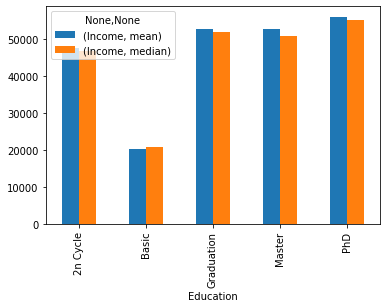

In [9]:
plot_for_1categorial("Education","Income")
#зависимость есть, в среднем и по медиане зп выше у phd, нижу у basic

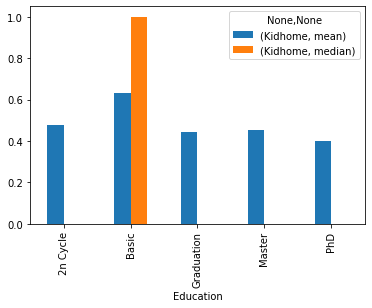

In [10]:
plot_for_1categorial("Education","Kidhome")
#если смотреть на медиану, то у не большинства basic нет Kidhome, и в среднем у basic больше

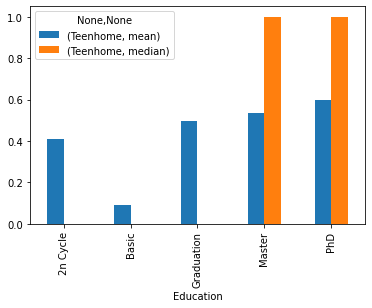

In [11]:
plot_for_1categorial("Education","Teenhome")
#у большинства phd и master есть Teenhome, в среднем у basic их мало

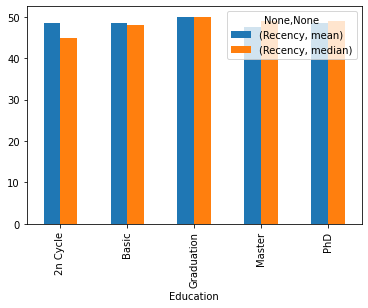

In [12]:
plot_for_1categorial("Education","Recency")
# маленькая зависимть 

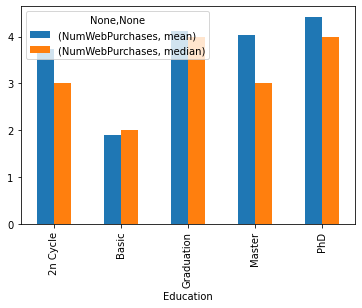

In [13]:
plot_for_1categorial("Education","NumWebPurchases")
#basic реже делают WebPurchases, phd чаще

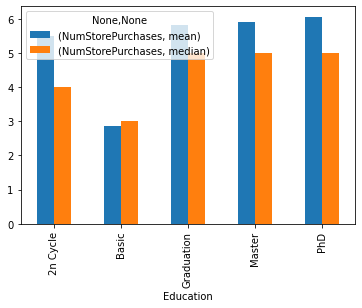

In [14]:
plot_for_1categorial("Education","NumStorePurchases")
#gradution, master, phd пости нет зависимости, покупки basic проседают

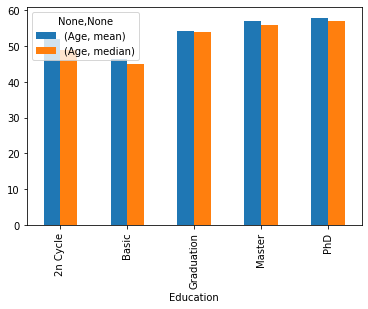

In [15]:
plot_for_1categorial("Education","Age")
#есть небольшая зависимость

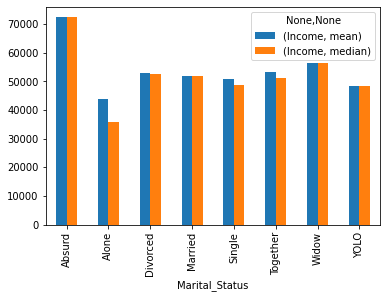

In [16]:
plot_for_1categorial("Marital_Status","Income")
#absurd больше зарабатывают, alone меньше

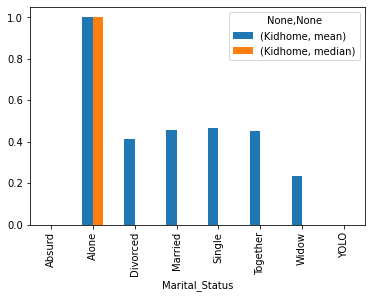

In [17]:
plot_for_1categorial("Marital_Status","Kidhome")
#странная зависимость, у alone больше маленьких детей, но мб это не их дети или выбросы

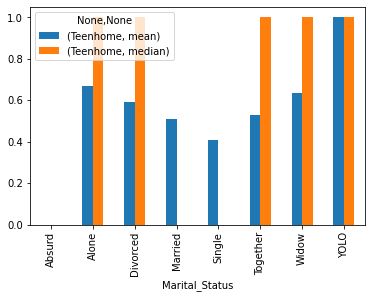

In [18]:
plot_for_1categorial("Marital_Status","Teenhome")
# у большинства alone, divorced, together, window, yolo есть Teenhome

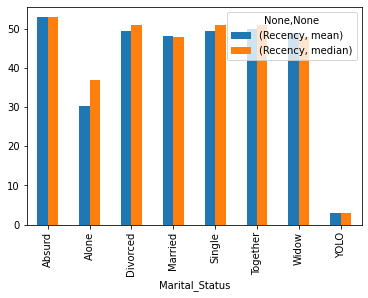

In [19]:
plot_for_1categorial("Marital_Status","Recency")
#yolo и alone выделяются

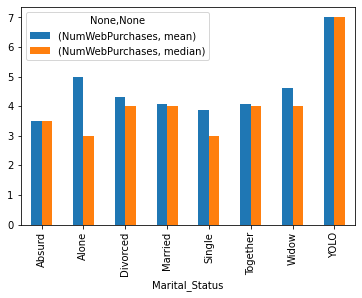

In [20]:
plot_for_1categorial("Marital_Status","NumWebPurchases")
#yolo делаеют чаще

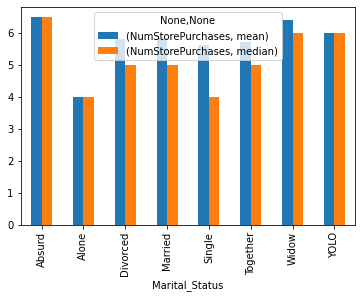

In [21]:
plot_for_1categorial("Marital_Status","NumStorePurchases")
#есть зависимость

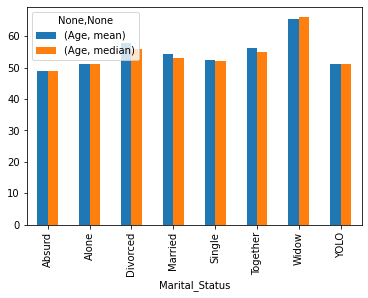

In [22]:
plot_for_1categorial("Marital_Status","Age")
#небольшая зависимость

In [23]:
def plot_not_categorial(feature1,feature2):
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.scatter(df[feature1], df[feature2])

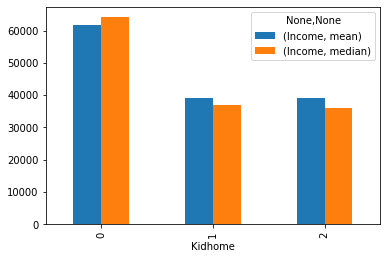

In [24]:
plot_for_1categorial("Kidhome", "Income")
# у людей без Kidhome зп больше

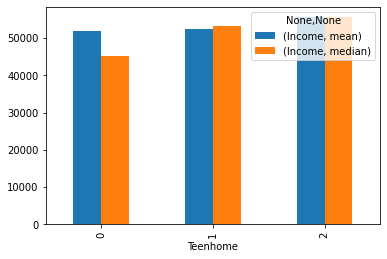

In [25]:
plot_for_1categorial("Teenhome", "Income")
# почти нет, разве что чем больше Teenhome зп чуть чуть растет

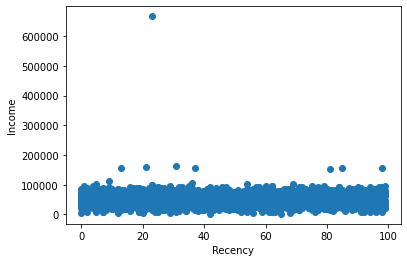

In [26]:
plot_not_categorial("Recency", "Income")
# нет

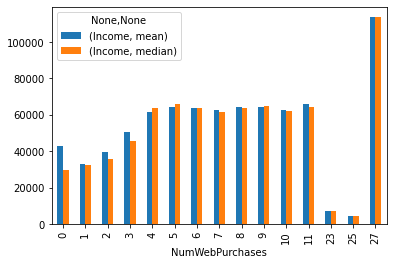

In [27]:
plot_for_1categorial( "NumWebPurchases","Income" )
# небольшая зависимомть между ростом заработка и NumWebPurchases

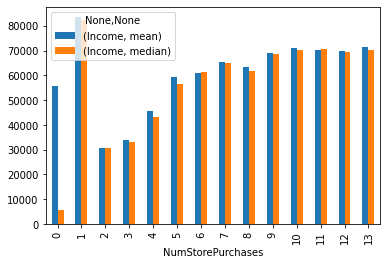

In [28]:
plot_for_1categorial( "NumStorePurchases","Income" )
# небольшая зависимомть между ростом заработка и NumStorePurchases

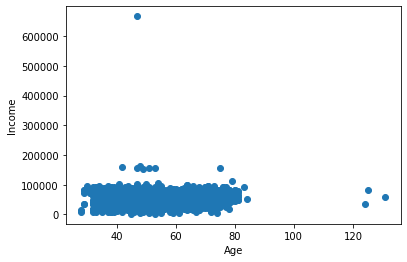

In [29]:
plot_not_categorial( "Age","Income" )
# чем страше - тем число мало зарабатывающих меньше

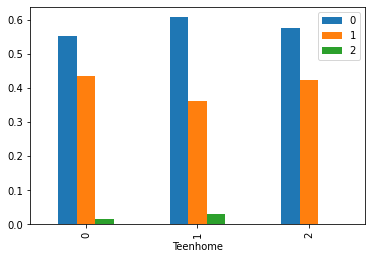

In [30]:
plot_for_2categorial( "Kidhome","Teenhome" )
# нет зависимости

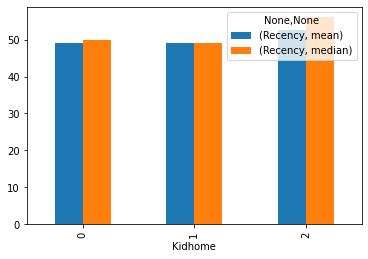

In [31]:
plot_for_1categorial( "Kidhome","Recency" )
# нет зависимости

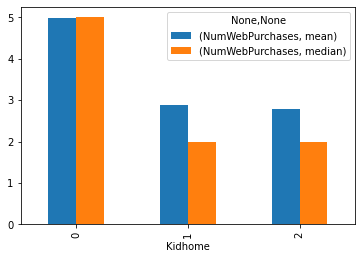

In [32]:
plot_for_1categorial( "Kidhome","NumWebPurchases" )
# у людей без Kidhome NumWebPurchases больше

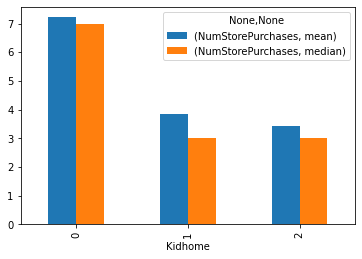

In [33]:
plot_for_1categorial( "Kidhome","NumStorePurchases" )
# у людей без Kidhome NumStorePurchases больше

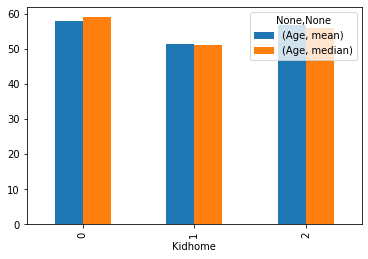

In [34]:
plot_for_1categorial( "Kidhome","Age" )
# почти нет

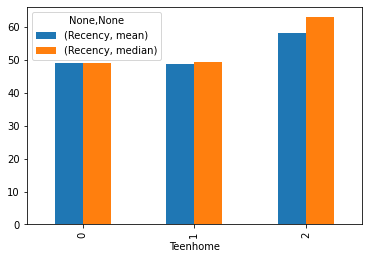

In [35]:
plot_for_1categorial( "Teenhome","Recency" )
# почти нет

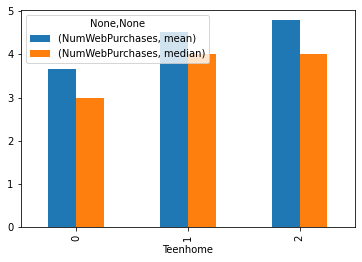

In [36]:
plot_for_1categorial( "Teenhome","NumWebPurchases" )
# NumWebPurchases возврастает с Teenhome

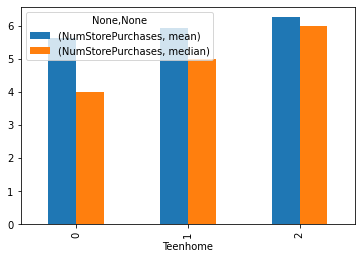

In [37]:
plot_for_1categorial( "Teenhome","NumStorePurchases" )
# NumStorePurchases возврастает с Teenhome

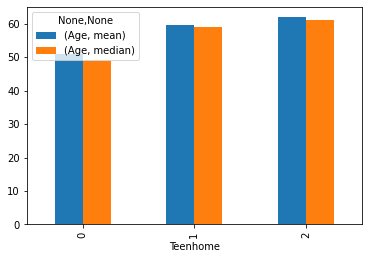

In [38]:
plot_for_1categorial( "Teenhome","Age" )
# Age возврастает с Teenhome

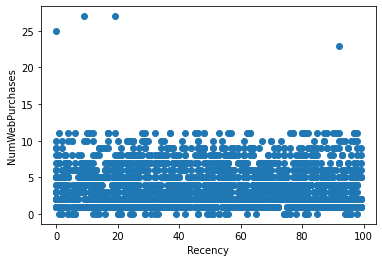

In [39]:
plot_not_categorial( "Recency","NumWebPurchases" )
# почти нет

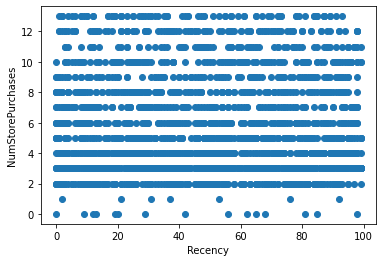

In [40]:
plot_not_categorial( "Recency","NumStorePurchases" )
# почти нет

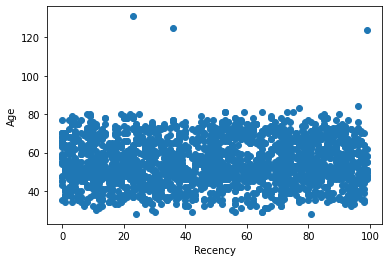

In [41]:
plot_not_categorial( "Recency","Age" )
# почти нет

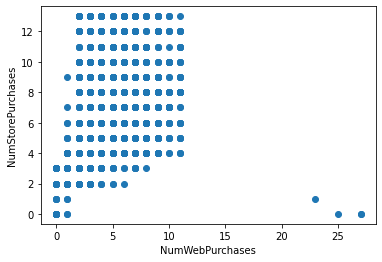

In [42]:
plot_not_categorial( "NumWebPurchases","NumStorePurchases" )
# NumWebPurchases  возврастает с NumStorePurchases

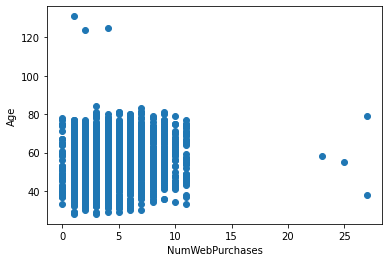

In [43]:
plot_not_categorial( "NumWebPurchases","Age" )
# почти нет

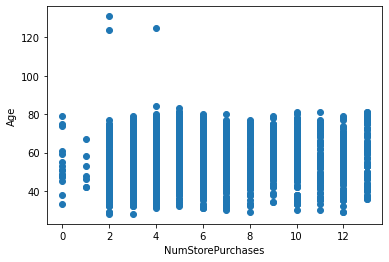

In [44]:
plot_not_categorial( "NumStorePurchases","Age" )
# почти нет

In [45]:
#3
# можем посмотреть нам  NumPurchases = NumCatalogPurchases + NumStorePurchases + NumWebPurchases, 
# взять 0,75 перцентиль и посмотреть на признаки, которые их описывают взять моду в случае категориальных фичей
# или взять промежуток от mean-mean*0.3 до mean+mean*0.3 в случае числовых фичей

In [46]:
df['NumPurchases'] = df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebPurchases']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,NumPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,57,16
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,78,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,43,18
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,68,21


In [47]:
sorted(df["NumPurchases"])[int(len(df["NumPurchases"])*0.75)]

18

In [48]:
df2 = df[df["NumPurchases"]>=18]
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,NumPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,22
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,20
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,3,11,0,57,20
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,0,1,1,0,0,3,11,1,78,25
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,0,0,1,0,0,3,11,0,75,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,...,0,0,0,0,0,3,11,0,54,19
2226,4478,1979,Graduation,Married,63777.0,1,1,2013-03-24,87,457,...,0,0,0,0,0,3,11,0,45,18
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,0,0,0,0,0,3,11,0,54,25
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,43,18


In [49]:
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome']
features_c = ['Education', 'Marital_Status']
target_audience = {}
for i in features+features_c:
    if i in features_c:
        target_audience[i] = df2[i].mode()[0]
    else:
        target_audience[i] = int(df2[i].mean())
target_audience

{'Year_Birth': 1967,
 'Income': 70594,
 'Kidhome': 0,
 'Teenhome': 0,
 'Education': 'Graduation',
 'Marital_Status': 'Married'}

In [50]:
target_audience_id = []

for i in range(len(df['ID'])):
    if abs(df['Year_Birth'][i]-1967) <=1967*0.3 and abs(df['Income'][i]-70594) <=70594*0.3 and df['Kidhome'][i]==0 and df['Teenhome'][i]==0 and df['Education'][i]=='Graduation' and df['Marital_Status'][i]=='Married':
        target_audience_id.append(df['ID'][i])
target_audience_id 

[8504,
 8908,
 1592,
 9597,
 8690,
 6982,
 9938,
 6422,
 0,
 2075,
 9529,
 1225,
 291,
 4543,
 7214,
 11056,
 7274,
 5125,
 7059,
 466,
 4943,
 8314,
 988,
 4990,
 10936,
 6086,
 7875,
 5278,
 3667,
 5331,
 10925,
 8624,
 9308,
 2008,
 10981,
 10286,
 5718,
 4580,
 1020,
 2875,
 8707,
 7959,
 10486,
 1740,
 378,
 1577,
 6055,
 5758,
 2407,
 4310,
 4682,
 6652,
 10770,
 6318,
 486,
 9264,
 528,
 2471,
 2612,
 5185,
 10711,
 477,
 7396,
 5796,
 9292,
 9645,
 1619,
 9064,
 1399,
 544,
 2181,
 10413,
 10676,
 4552,
 4122,
 10701,
 2254,
 5396,
 7233,
 10394]